In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs-training.csv",index_col=0)
print(df.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [7]:
 print(df.isnull().sum())
 #Here we are checking for missing values

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


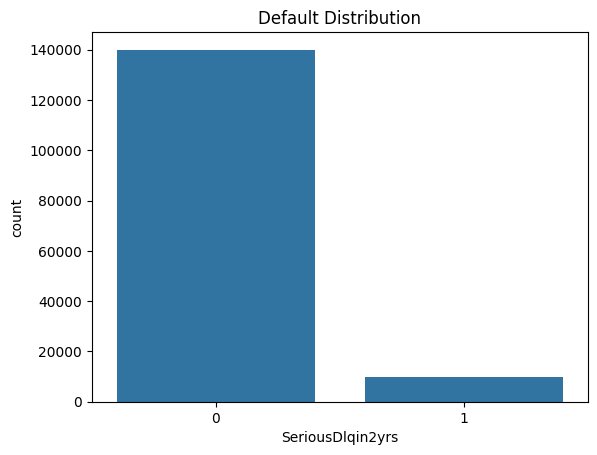

In [8]:
sns.countplot(x='SeriousDlqin2yrs',data=df)
plt.title("Default Distribution")
plt.show()

In [9]:
#Handling missing values
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents']=df['NumberOfDependents'].fillna(0)

In [10]:
from sklearn.preprocessing import StandardScaler
x=df.drop("SeriousDlqin2yrs",axis=1)
y=df["SeriousDlqin2yrs"]

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2, random_state=42,stratify=y)
print(x_train,x_test)

        RevolvingUtilizationOfUnsecuredLines       age  \
57836                              -0.023757  0.656980   
132895                             -0.024183  1.401642   
27981                              -0.023359 -1.373914   
37852                              -0.020214  0.521587   
103813                             -0.023295  0.521587   
...                                      ...       ...   
18048                              -0.024201 -0.764646   
3895                               -0.024218 -0.223074   
109980                             -0.020214  1.875517   
74354                              -0.020513  0.724677   
80530                              -0.020214 -0.764646   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
57836                              -0.100419   0.730193      -0.079009   
132895                             -0.100419  -0.172983      -0.203133   
27981                              -0.100419  -0.173123      -0.209649   
37852  

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,RocCurveDisplay

model=LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_predict))
print("\nClassification Report:\n",classification_report(y_test,y_predict))
print("ROC-AUC Score:",roc_auc_score(y_test,y_prob))

Confusion Matrix:
 [[21953  6042]
 [  663  1342]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     27995
           1       0.18      0.67      0.29      2005

    accuracy                           0.78     30000
   macro avg       0.58      0.73      0.58     30000
weighted avg       0.92      0.78      0.83     30000

ROC-AUC Score: 0.8022059158230518


What does the confusion matrix tells:
TN(Total Negative): 21953:mean correctly predicted no default
FP(False Positive):6042 :Means mistakely flagged safe borrower
FN(False Negative):663 Means Missed 663 defaulters
TP:1342 means caught 1342 defaulters

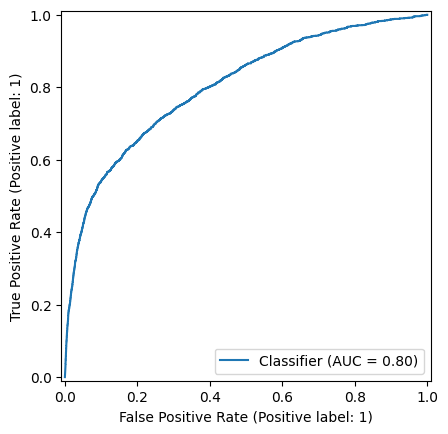

In [16]:
RocCurveDisplay.from_predictions(y_test,y_prob)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,RocCurveDisplay

rf_model=RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth=None,random_state=42,n_jobs=-1)
#Traing the model
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
y_prob_rf=rf_model.predict_proba(x_test)[:,1]

In [18]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report:\n",classification_report(y_test,y_pred_rf))
print("ROC_AUC Score:",roc_auc_score(y_test,y_prob_rf))

Confusion Matrix:
 [[27757   238]
 [ 1700   305]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.56      0.15      0.24      2005

    accuracy                           0.94     30000
   macro avg       0.75      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000

ROC_AUC Score: 0.8380290566671373


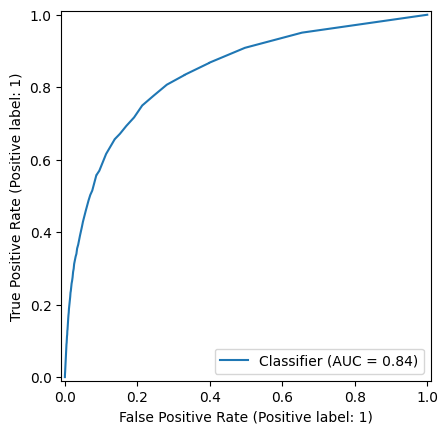

In [19]:
RocCurveDisplay.from_predictions(y_test,y_prob_rf)

In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay

xgb_model=xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)

In [21]:
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)
xgb_prob=xgb_model.predict_proba(x_test)[:,1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred_xgb))
print("\nClassification Report\n",classification_report(y_test,y_pred_xgb))
print("ROC-AUC Score:",roc_auc_score(y_test,xgb_prob))

Confusion Matrix
 [[27719   276]
 [ 1599   406]]

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     27995
           1       0.60      0.20      0.30      2005

    accuracy                           0.94     30000
   macro avg       0.77      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000

ROC-AUC Score: 0.8682061590086224


In [23]:
new_customer = pd.DataFrame([{
    'RevolvingUtilizationOfUnsecuredLines': 0.3,
    'age': 35,
    'NumberOfTime30-59DaysPastDueNotWorse': 1,
    'DebtRatio': 0.6,
    'MonthlyIncome': 4000,
    'NumberOfOpenCreditLinesAndLoans': 5,
    'NumberOfTimes90DaysLate': 0,
    'NumberRealEstateLoansOrLines': 0,
    'NumberOfTime60-89DaysPastDueNotWorse': 1,
    'NumberOfDependents': 1
}])

In [28]:
prob=float(xgb_model.predict_proba(new_customer)[:,1])
pred_class=xgb_model.predict(new_customer)[0]

/tmp/ipython-input-28-536769806.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob=float(xgb_model.predict_proba(new_customer)[:,1])


In [29]:
score = int(850 - prob * 550)

print(f"Predicted Default Probability: {prob:.4f}")
print(f"Credit Risk: {'Default' if pred_class == 1 else 'Safe'}")
print(f"Estimated Credit Score: {score}")


Predicted Default Probability: 0.7078
Credit Risk: Default
Estimated Credit Score: 460


In [31]:
#Creating the final function to analyze score
def predict_credit_score(customer_input,model,scaler,reference_df):
  customer_input=customer_input.copy()
  customer_input['MonthlyIncome']=customer_input['MonthlyIncome'].fillna(reference_df['MonthlyIncome'].median())
  customer_input['NumberOfDependents']=customer_input['NumberOfDependents'].fillna(0)
  customer_input_scaled=scaler.transform(customer_input)
  customer_input=customer_input[reference_df.columns]
  prob=float(model.predict_proba(customer_input_scaled)[:,1])
  pred_class=model.predict(customer_input_scaled)[0]
  score = int(850 - prob * 550)
  print(f"Predicted Default Probability: {prob:.4f}")
  print(f"Credit Risk: {'Default' if pred_class == 1 else 'Safe'}")
  print(f"Estimated Credit Score: {score}")

In [32]:
new_customer = pd.DataFrame([{
    'RevolvingUtilizationOfUnsecuredLines': 0.3,
    'age': 35,
    'NumberOfTime30-59DaysPastDueNotWorse': 1,
    'DebtRatio': 0.6,
    'MonthlyIncome': 4000,
    'NumberOfOpenCreditLinesAndLoans': 5,
    'NumberOfTimes90DaysLate': 0,
    'NumberRealEstateLoansOrLines': 0,
    'NumberOfTime60-89DaysPastDueNotWorse': 1,
    'NumberOfDependents': 1
}])
predict_credit_score(new_customer,model=xgb_model,scaler=scaler,reference_df=x_train)

Predicted Default Probability: 0.2534
Credit Risk: Safe
Estimated Credit Score: 710


/tmp/ipython-input-31-2662882029.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob=float(model.predict_proba(customer_input_scaled)[:,1])
